In [2]:
!pip install tensorflow

In [3]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

from keras import Model, layers
from keras.models import load_model, model_from_json
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.layers import Dropout

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from tensorflow.keras.callbacks import (
    Callback,
    CSVLogger,
    EarlyStopping,
    LearningRateScheduler,
    ModelCheckpoint
)

In [5]:
print(tf.__version__)
print(tf.config.list_logical_devices('GPU'))

tf.test.is_gpu_available()

2.18.0


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


[LogicalDevice(name='/device:GPU:0', device_type='GPU')]


True

In [11]:
data_path = '/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/EyeDiseaseDataset'

# Data Augmentation
datagen = ImageDataGenerator(
    validation_split=0.2,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    brightness_range=[0.5, 1.5],
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    preprocessing_function=preprocess_input
    )
# Train generator (80%)
train_generator = datagen.flow_from_directory(
    data_path,
    subset='training',
    batch_size=32,
    class_mode='categorical',
    target_size=(256, 256),
    shuffle=True,
    )
# Validation generator (20%)
validation_generator = datagen.flow_from_directory(
    data_path,
    subset='validation',
    shuffle=False,
    class_mode='categorical',
    batch_size=32,
    target_size=(256, 256)
    )

Found 4800 images belonging to 6 classes.
Found 1200 images belonging to 6 classes.


Class Names: ['Cataract', 'Diabetic Retinopathy', 'Glaucoma', 'Healthy', 'Macular Scar', 'Myopia']


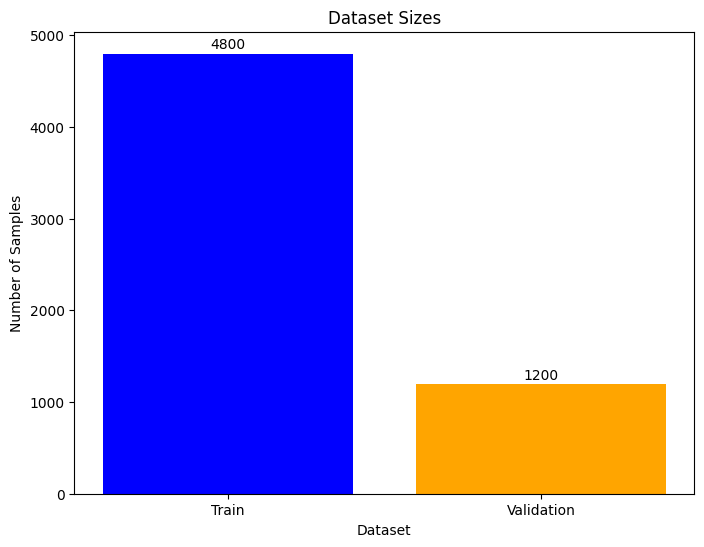

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Lấy tên lớp
class_names = list(train_generator.class_indices.keys())
print("Class Names:", class_names)

# Lấy số lượng mẫu trong từng tập
train_size = train_generator.samples
val_size = validation_generator.samples

# Vẽ biểu đồ
dataset_sizes = [train_size, val_size]
dataset_labels = ['Train', 'Validation']

plt.figure(figsize=(8, 6))
plt.bar(dataset_labels, dataset_sizes, color=['blue', 'orange'])
plt.title('Dataset Sizes')
plt.xlabel('Dataset')
plt.ylabel('Number of Samples')

# Thêm nhãn số trên cột
for i, size in enumerate(dataset_sizes):
    plt.text(i, size + 20, str(size), ha='center', va='bottom')

plt.show()

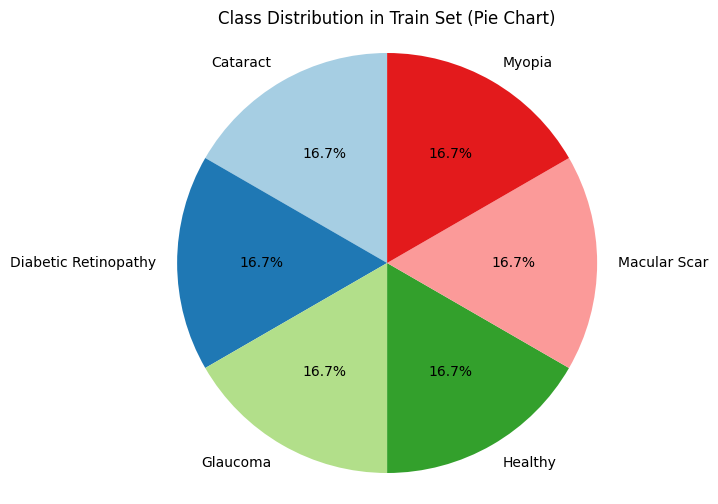

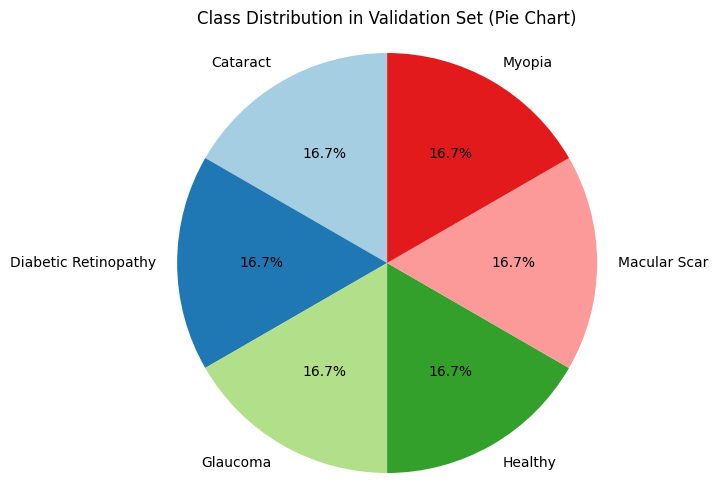

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Lấy tên lớp
class_names = list(train_generator.class_indices.keys())

def plot_class_distribution_pie(generator, generator_name):
    labels = generator.classes
    class_counts = np.bincount(labels)

    plt.figure(figsize=(8, 6))
    plt.pie(class_counts, labels=class_names,
            autopct='%1.1f%%', startangle=90,
            colors=plt.cm.Paired.colors[:len(class_names)])
    plt.title(f'Class Distribution in {generator_name} Set (Pie Chart)')
    plt.axis('equal')
    plt.show()

# Vẽ biểu đồ phân bố lớp
plot_class_distribution_pie(train_generator, 'Train')
plot_class_distribution_pie(validation_generator, 'Validation')

In [ ]:
# Get the class names from the subdirectories in the training directory
class_names = sorted(os.listdir(data_path))

# Print the class names and the number of classes
print("Class Names:", class_names)
num_classes = len(class_names)
print("Number of Classes:", num_classes)

Class Names: ['Cataract', 'Diabetic Retinopathy', 'Glaucoma', 'Healthy', 'Macular Scar', 'Myopia']
Number of Classes: 6


In [ ]:
def visualize_images(path, target_size=(256, 256), num_images=5):

    # Get a list of image filenames
    image_filenames = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

    if not image_filenames:
        raise ValueError("No images found in the specified path")

    # Select random images
    selected_images = random.sample(image_filenames, min(num_images, len(image_filenames)))

    # Create a figure and axes
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3), facecolor='white')

    # Display each image
    for i, image_filename in enumerate(selected_images):
        # Load image and resize
        image_path = os.path.join(path, image_filename)
        image = Image.open(image_path)
        image = image.resize(target_size)

        # Display image
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_filename)  # Set image filename as title

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

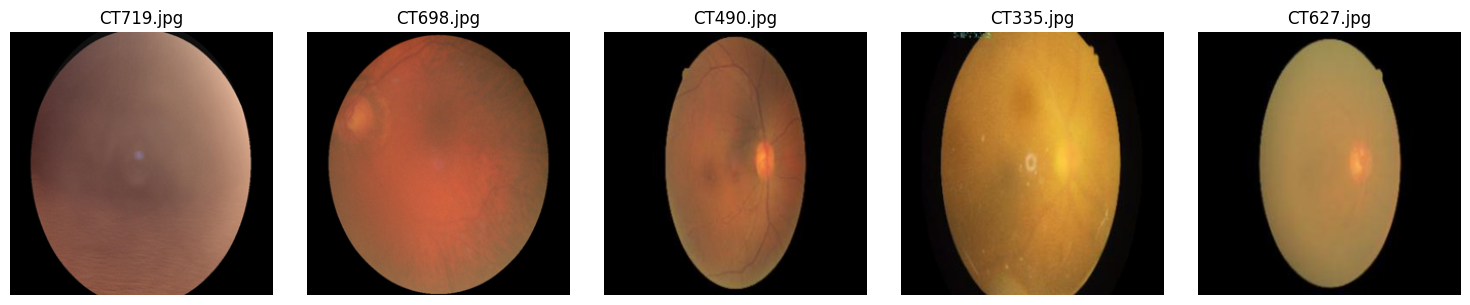

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/EyeDiseaseDataset/Cataract"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

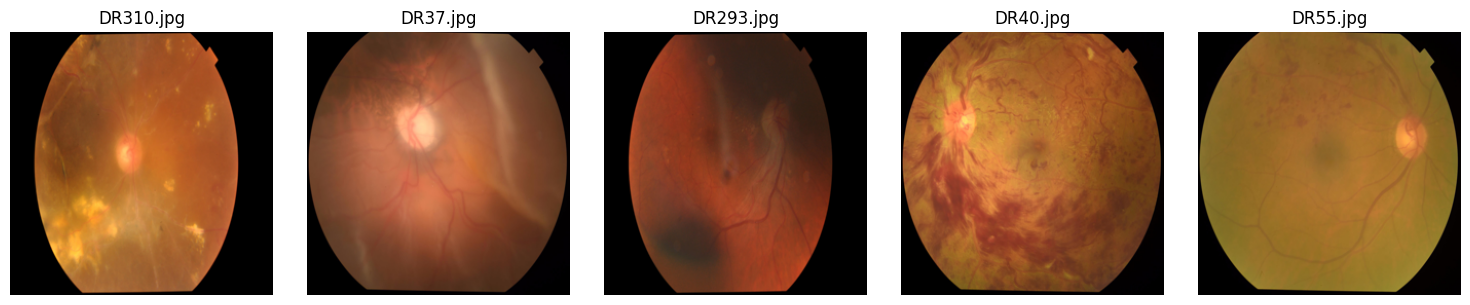

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/EyeDiseaseDataset/Diabetic Retinopathy"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

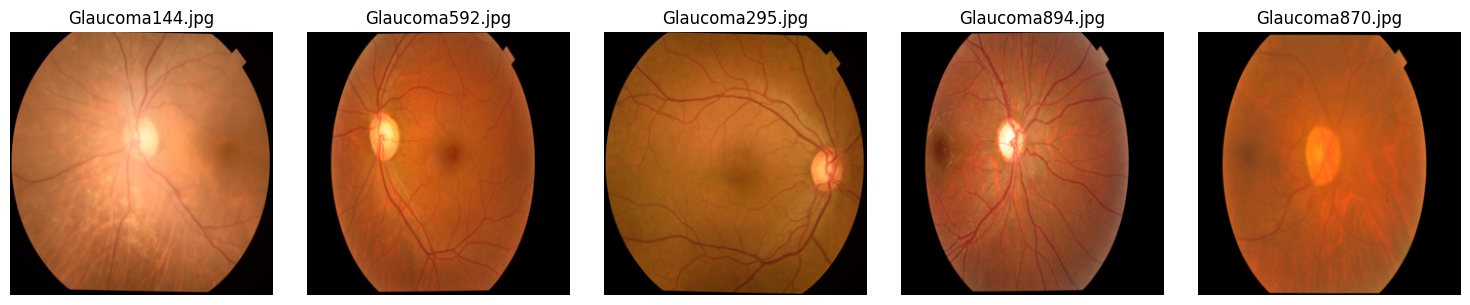

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/EyeDiseaseDataset/Glaucoma"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

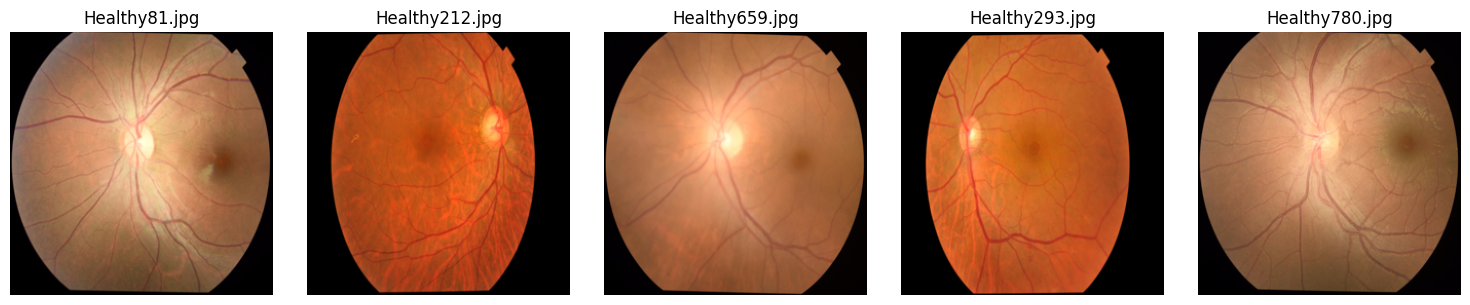

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/EyeDiseaseDataset/Healthy"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

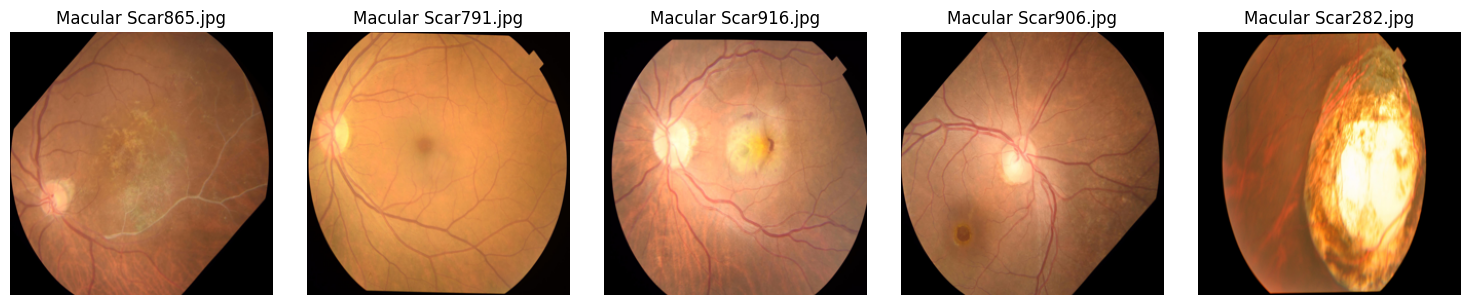

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/EyeDiseaseDataset/Macular Scar"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

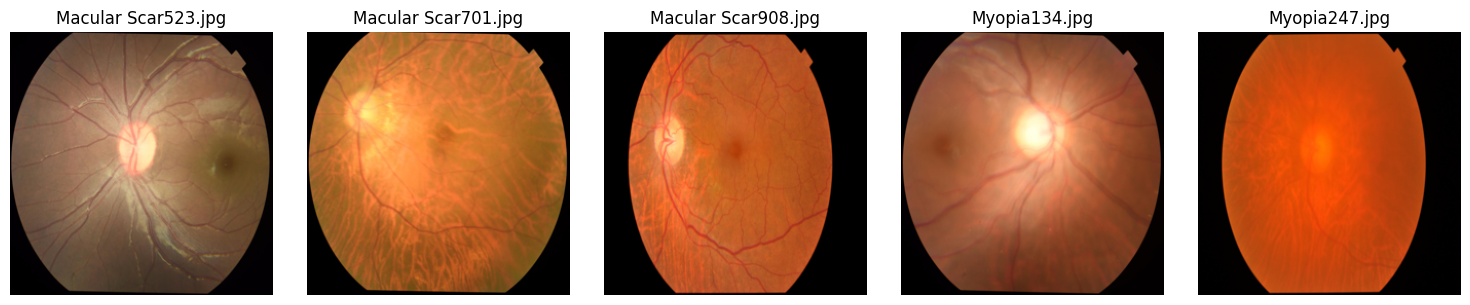

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/EyeDiseaseDataset/Myopia"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

In [ ]:
from tensorflow.keras import regularizers

base_model = MobileNetV2(weights='imagenet', include_top=False,
                         input_shape=(256, 256, 3))
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu', kernel_regularizer = regularizers.l2(0.01))(x)
x = layers.Dropout(0.2)(x)
predictions = layers.Dense(6, activation='softmax', kernel_regularizer = regularizers.l2(0.01))(x)
models = Model(inputs=base_model.input, outputs=predictions)
models.summary()

<ipython-input-15-eeea7d40c696>:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False,


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 128, 128,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 128, 128,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 128, 128,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 128, 128,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 128, 128,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 128, 128,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 128, 128,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 128, 128,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 128, 128,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 128, 128,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 128, 128,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 129, 129,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 64, 64,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 64, 64,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 64, 64,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 64, 64,    │      2,304 │ block_1_depthwis

 Total params: 2,916,934 (11.13 MB)

 Trainable params: 2,882,822 (11.00 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [ ]:
checkpoint_callback = ModelCheckpoint(
    '/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/result_3/best_mobilenetv2.h5',
    monitor='val_accuracy',
    mode='max',
    verbose=1,
    save_best_only=True
)
early_stopping_callback = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

csv_logger_callback = CSVLogger(
    '/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/result_3/training_history.csv', append=True
)

for layer in base_model.layers:
    layer.trainable = False

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

models.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [ ]:
# Train the model
history = models.fit(
    x=train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[checkpoint_callback, early_stopping_callback, csv_logger_callback]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.5196 - loss: 5.7291 
Epoch 1: val_accuracy improved from -inf to 0.61583, saving model to /content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/result_3/best_mobilenetv2.h5


150/150 ━━━━━━━━━━━━━━━━━━━━ 3439s 23s/step - accuracy: 0.5201 - loss: 5.7169 - val_accuracy: 0.6158 - val_loss: 2.0301
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6463 - loss: 1.8029
Epoch 2: val_accuracy improved from 0.61583 to 0.64250, saving model to /content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/result_3/best_mobilenetv2.h5


150/150 ━━━━━━━━━━━━━━━━━━━━ 216s 1s/step - accuracy: 0.6463 - loss: 1.8017 - val_accuracy: 0.6425 - val_loss: 1.3603
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6715 - loss: 1.2995
Epoch 3: val_accuracy did not improve from 0.64250
150/150 ━━━━━━━━━━━━━━━━━━━━ 257s 1s/step - accuracy: 0.6715 - loss: 1.2991 - val_accuracy: 0.6233 - val_loss: 1.2103
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6623 - loss: 1.1484
Epoch 4: val_accuracy improved from 0.64250 to 0.65250, saving model to /content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/result_3/best_mobilenetv2.h5


150/150 ━━━━━━━━━━━━━━━━━━━━ 219s 1s/step - accuracy: 0.6623 - loss: 1.1483 - val_accuracy: 0.6525 - val_loss: 1.1349
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6583 - loss: 1.1024
Epoch 5: val_accuracy improved from 0.65250 to 0.65417, saving model to /content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/result_3/best_mobilenetv2.h5


150/150 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 0.6583 - loss: 1.1023 - val_accuracy: 0.6542 - val_loss: 1.0962
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6535 - loss: 1.0569
Epoch 6: val_accuracy did not improve from 0.65417
150/150 ━━━━━━━━━━━━━━━━━━━━ 252s 2s/step - accuracy: 0.6535 - loss: 1.0570 - val_accuracy: 0.6367 - val_loss: 1.1081
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6723 - loss: 1.0414
Epoch 7: val_accuracy improved from 0.65417 to 0.65583, saving model to /content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/result_3/best_mobilenetv2.h5


150/150 ━━━━━━━━━━━━━━━━━━━━ 210s 1s/step - accuracy: 0.6722 - loss: 1.0414 - val_accuracy: 0.6558 - val_loss: 1.0232
Epoch 8/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6667 - loss: 1.0151
Epoch 8: val_accuracy did not improve from 0.65583
150/150 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - accuracy: 0.6667 - loss: 1.0152 - val_accuracy: 0.6558 - val_loss: 1.0492
Epoch 9/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6541 - loss: 1.0535
Epoch 9: val_accuracy improved from 0.65583 to 0.67250, saving model to /content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/result_3/best_mobilenetv2.h5


150/150 ━━━━━━━━━━━━━━━━━━━━ 268s 1s/step - accuracy: 0.6542 - loss: 1.0533 - val_accuracy: 0.6725 - val_loss: 0.9964
Epoch 10/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6729 - loss: 1.0064
Epoch 10: val_accuracy did not improve from 0.67250
150/150 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.6729 - loss: 1.0064 - val_accuracy: 0.6708 - val_loss: 1.0569
Epoch 11/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6699 - loss: 1.0136
Epoch 11: val_accuracy did not improve from 0.67250
150/150 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.6698 - loss: 1.0136 - val_accuracy: 0.6675 - val_loss: 0.9953
Epoch 12/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6810 - loss: 0.9850
Epoch 12: val_accuracy did not improve from 0.67250
150/150 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step - accuracy: 0.6809 - loss: 0.9851 - val_accuracy: 0.6717 - val_loss: 0.9972
Epoch 13/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6738 - loss: 1.0123
Epoch 13: val_accuracy did n

In [ ]:
models.save('/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/result_3/last_mobilenetv2.h5')

In [10]:
from tensorflow.keras.models import load_model

model_path = '/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/result_3/best_mobilenetv2.h5'
model = load_model(model_path)

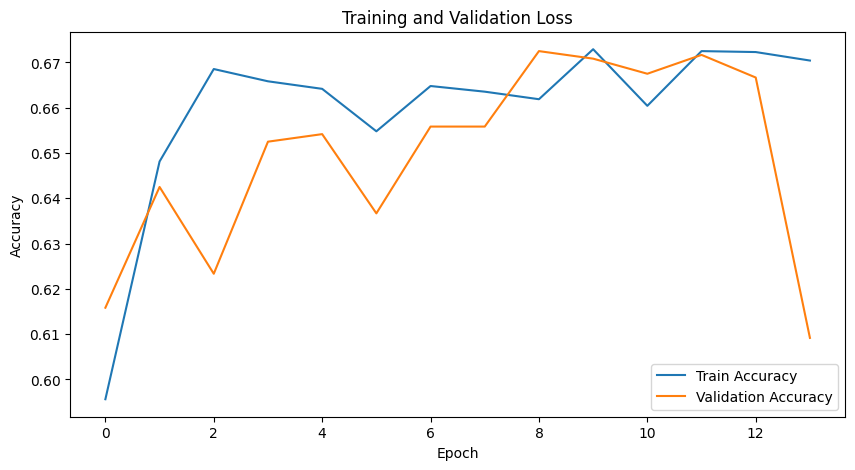

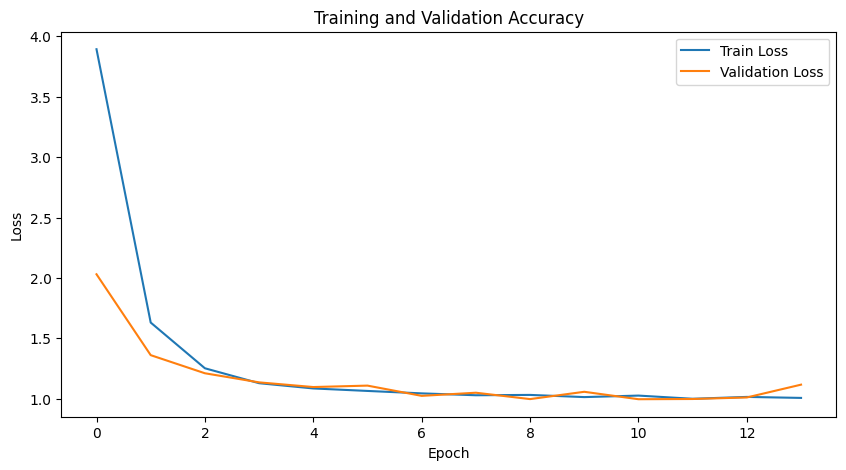

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

history_df = pd.read_csv('/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/result_3/training_history.csv')

# Vẽ Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history_df['accuracy'], label='Train Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy qua các Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Loss')
plt.savefig('/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/result_3/loss_plot.webp_1', format='webp')
plt.show()

# Vẽ Loss
plt.figure(figsize=(10, 5))
plt.plot(history_df['loss'], label='Train Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Loss qua các Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.savefig('/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/result_3/accuracy_plot.webp_1', format='webp')
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 423s 11s/step


<Figure size 1000x800 with 0 Axes>

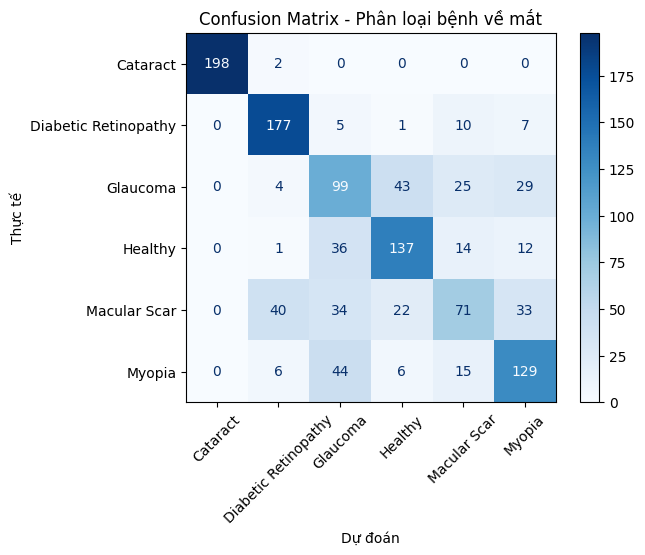

In [12]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_probs = model.predict(validation_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

y_true = validation_generator.classes

class_names = list(validation_generator.class_indices.keys())

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(figsize=(10, 8))
disp.plot(cmap='Blues', values_format='d')
plt.xticks(rotation=45)
plt.title('Confusion Matrix - Phân loại bệnh về mắt')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()

In [ ]:
from PIL import Image

validation_img_paths = ["/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/EyeDiseaseDataset/Cataract/CT1000.png",
                        "/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/EyeDiseaseDataset/Diabetic Retinopathy/DR104.jpg",
                        "/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/EyeDiseaseDataset/Healthy/Healthy102.jpg",
                        "/content/drive/MyDrive/ChuyenDeChuyenSauTTNT2/my project/EyeDiseaseDataset/Glaucoma/Glaucoma126.jpg",
                        "/content/macular_test.jpg",
                        "/content/myopia_test.jpg"]
img_list = [Image.open(img_path) for img_path in validation_img_paths]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


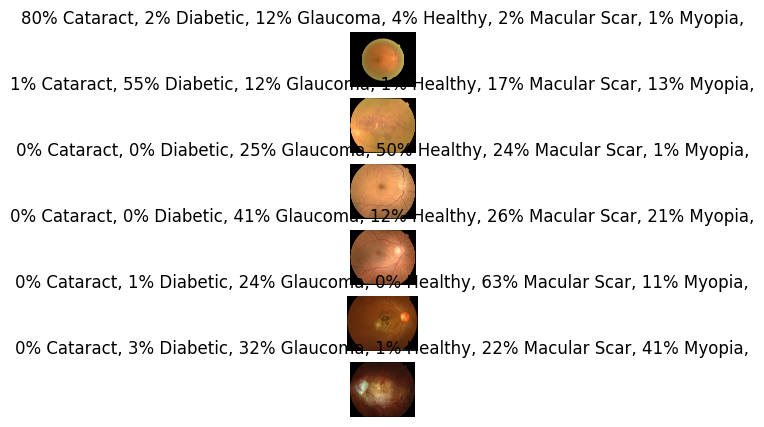

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

validation_batch = np.stack([preprocess_input(np.array(img.resize((256, 256)))) for img in img_list])

pre_prob = model.predict(validation_batch)

fig, axs = plt.subplots(6, 1, figsize=(20, 5))
for i, img in enumerate(img_list):
  ax = axs[i]
  ax.axis('off')
  ax.set_title("{:.0f}% Cataract, {:.0f}% Diabetic, {:.0f}% Glaucoma, {:.0f}% Healthy, {:.0f}% Macular Scar, {:.0f}% Myopia,".format(100*pre_prob[i][0], 100*pre_prob[i][1], 100*pre_prob[i][2], 100*pre_prob[i][3], 100*pre_prob[i][4], 100*pre_prob[i][5]))
  ax.imshow(img)